## Import Libraries

In [25]:
# https://medium.com/@krishna.ramesh.tx/training-a-cnn-to-distinguish-between-mnist-digits-using-pytorch-620f06aa9ffa

import torch, torchvision # for transform images
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt

import copy

# torch.cuda.is_available()

In [4]:
numb_batch = 64

## Getting Data

In [7]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])


train_data = torchvision.datasets.MNIST('mnist_data',train=True, download=True,transform=T)
val_data = torchvision.datasets.MNIST('mnist_data',train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size=numb_batch)
val_dl = torch.utils.data.DataLoader(val_data, batch_size = numb_batch)

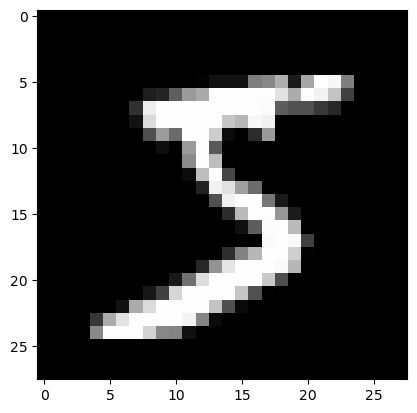

In [13]:
plt.imshow(train_data[0][0][0], cmap='gray')

## Create the Model

In [16]:
def create_lenet():
    model = nn.Sequential(
        nn.Conv2d(1,6,5,padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),

        nn.Conv2d(6,16,5,padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),

        nn.Flatten(),
        nn.Linear(400,120),
        nn.ReLU(),
        nn.Linear(120,84),
        nn.ReLU(),
        nn.Linear(84,10)
    )


    return model

## Validate Model

In [17]:
def validate(model,data):
    total =0 
    correct = 0
    for i, (images,labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct * 100 / total

## Training function

In [27]:
def train(numb_epoch=3, lr=1e-3, device="cpu"):
    accuracies = []
    cnn = create_lenet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr = lr)
    max_accuracy = 0

    for epoch in range(numb_epoch):
        for i, (images,labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()

        accuracy = float(validate(cnn,val_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print("Epoch: ", epoch+1, "Accuracy: ", accuracy, "%")
    plt.plot(accuracies)
    return best_model




## GPU Availablity

In [19]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

In [20]:
device

device(type='cuda', index=0)

## Training Model

Saving Best Model with Accuracy:  95.51000213623047
Epoch:  1 Accuracy:  95.51000213623047 %
Saving Best Model with Accuracy:  97.19999694824219
Epoch:  2 Accuracy:  97.19999694824219 %
Saving Best Model with Accuracy:  97.80999755859375
Epoch:  3 Accuracy:  97.80999755859375 %
Saving Best Model with Accuracy:  98.25
Epoch:  4 Accuracy:  98.25 %
Saving Best Model with Accuracy:  98.48999786376953
Epoch:  5 Accuracy:  98.48999786376953 %
Saving Best Model with Accuracy:  98.6500015258789
Epoch:  6 Accuracy:  98.6500015258789 %
Saving Best Model with Accuracy:  98.83000183105469
Epoch:  7 Accuracy:  98.83000183105469 %
Epoch:  8 Accuracy:  98.7300033569336 %
Epoch:  9 Accuracy:  98.80999755859375 %
Epoch:  10 Accuracy:  98.69000244140625 %
Epoch:  11 Accuracy:  98.69000244140625 %
Epoch:  12 Accuracy:  98.83000183105469 %
Epoch:  13 Accuracy:  98.80000305175781 %
Epoch:  14 Accuracy:  98.61000061035156 %
Epoch:  15 Accuracy:  98.80999755859375 %
Saving Best Model with Accuracy:  98.86000

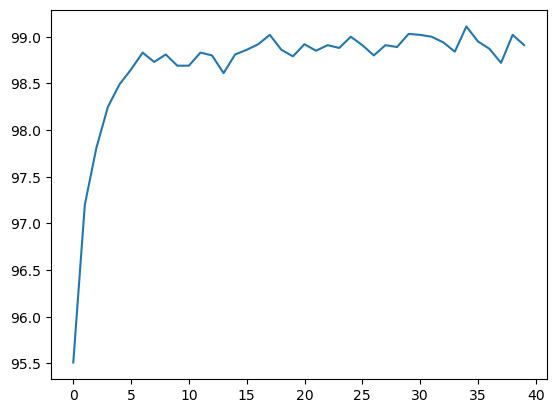

In [28]:
lenet = train(40,device=device)

In [30]:
torch.save(lenet.state_dict(), "lenet.pth")

"""
loading the model

lenet = create_lenet().to(device)
lenet.load_state_dict(torch.load("lenet.pth"))
lenet.eval()

"""

'\nloading the model\n\nlenet = create_lenet().to(device)\nlenet.load_state_dict(torch.load("lenet.pth"))\nlenet.eval()\n\n'